<a href="https://colab.research.google.com/github/gfbfilho/Data-Science/blob/master/An%C3%A1lise_dos_Dados_do_Airbnb_T%C3%B3quio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos Dados do Airbnb - **Tóquio** 


<center><img alt="Analisando Airbnb" width="40%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"><img alt="Tokyo" width="30%" src="https://i.pinimg.com/564x/f7/a2/e6/f7a2e6986a4956439d739a368a442c91.jpg"> </center>


O [Airbnb](https://www.airbnb.com.br/) (*airbed and breakfast*) surgiu em 2008, quando dois designers hospedaram três viajantes que procuravam um espaço para ficar. Agora, essa startup ajuda no anúncio de espaços para reservas de acomodações em qualquer lugar do mundo. 

**Alguns de seus atrativos são**: plataforma virtual que garante atendimento 24h, 7 dias por semana; seus preços, muitas das vezes menores do que os meios tradicionais de acomodações; e a relação da empresa com os envolvidos, pois muitos de seus funcionários são anfitriões e hóspedes que utilizam a plataforma.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à cidade de Tóquio, capital do Japão, e ver quais *insights* podem ser extraídos a partir de dados brutos.**

# **Tóquio** - Capital Japonesa

Tóquio é uma cidade bastante chamativa para os turistas, pois nela podemos encontrar:

* O Shibuya Crossing - cruzamento mais movimenta do mundo, palco de cenas de vários filmes e animes:

<center><img alt="Shibuya Crossing" width="40%" src="https://images.squarespace-cdn.com/content/555cbc7ee4b059e095f39179/1524594838588-XAVPEDK00I4HJ44MAD44/shibuya-crossing-10.jpg?format=1500w&content-type=image%2Fjpeg"> </center>

* O Tokyo Skytree - a segunda torre mais alta do mundo e a mais alta do Japão, inspirada na Torre Eiffel:

<center><img alt="Tokyo Skytree" width="40%" src="https://www.gotokyo.org/en/spot/6/images/4507_1_750x503.jpg"> </center>

* O Parque Ueno - destaque na primavera com o florar rosado das cerejeiras:

<center><img alt="Tokyo Skytree" width="40%" src="https://farm4.staticflickr.com/3212/2685558360_310360dce4_o.jpg"> </center>

* Bairros históricos repletos de templos:

<center><img alt="Tokyo Skytree" width="40%" src="https://cdn1.peakwork.com/84aAfgiUNT28GP59TmcWeBZwdOc=/360x240/smart/https://contenthub.smartyhub.com/uploads/images/2018/03/1521038667.jpg"> </center>

Além disso, destaca-se pela cultura geek bastante presente e por ser considerada uma das cidades mais inovadoras do mundo.

Apesar de apresentar bastante pontos favoráveis, também apresenta suas desvantagens, principalmente por ser considerada uma das cidades mais caras do mundo para se viver e por sofrer bastante com muitos terremotos e outros desastres naturais, por estar localizada numa região de fronteiras entre placas tectônicas.



## Obtenção dos Dados

Para esta etapa inicial, os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Como é de interesse analisar dados referentes à cidade de Tóquio, o seguinte arquivo foi baixado:

* `listings.csv` - *Summary information and metrics for listings in Tokyo (good for visualisations)* - dados atualizados em 25 / 06 / 2020.



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-06-25/visualisations/listings.csv")

## Análise dos Dados

Esta etapa é de fundamental importância para se adquirir um conhecimento prévio sobre os dados obtidos, uma vez que permite a verificação e um melhor entendimento de como eles estão estruturados; além de conhecer quais informações eles nos fornecem e quais serão de nosso interesse.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar como é organizado o nosso *dataset*, para as 10 primeiras entradas.

In [ ]:
# mostrar as 10 primeiras entradas
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4163,28,18,2018-07-28,0.17,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10993,3,165,2020-03-04,1.55,1,300
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4163,28,113,2020-02-17,1.16,2,165
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,7044,28,103,2020-04-16,1.35,3,361
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3949,28,104,2020-05-12,1.11,2,353
5,872235,RELAX AT HOME:Shimo 5'/Shibuya 10',1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66832,139.65159,Entire home/apt,8005,28,45,2020-04-22,0.51,3,59
6,899003,"Classy room @Shinjuku, Takadanoba",4799233,Yu,NaN,Shinjuku Ku,35.70865,139.69681,Entire home/apt,5230,30,93,2019-11-25,1.04,2,172
7,905944,4F - Near Shinjuku & Shibuya w/Free WiFi,4847803,Best Stay In Tokyo!,NaN,Shibuya Ku,35.67878,139.67847,Entire home/apt,9606,3,185,2020-03-27,2.10,11,288
8,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65833,139.67153,Private room,7044,1,211,2020-03-16,2.40,1,2
9,1096292,2 rooms homestay with a kid-family,6018145,Mari,NaN,Shinjuku Ku,35.69098,139.70618,Private room,12488,1,251,2020-02-15,3.04,3,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O *dataset* que foi adquirido apresenta **14715** entradas e **16** variáveis. Lembramos, porém, que o arquivo baixado `listings.csv` é uma versão resumida fornecida pela Airbnb. Uuma versão mais "completa", com uma quantidade maior de variáveis, pode ser encontrada através de arquivos `listings.csv.gz`, que possui  **14715** e **106** variáveis.

In [ ]:
# identificação do volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))


display(df.dtypes)

Entradas:	 14715
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset* ?**

Valores ausentes podem atrapalhar a manipulação dos dados e a obtenção dos resultados desejados. Logo, de início, verificamos a existência e quantidade de valores ausentes.

No *dataset* em estudo, percebemos que:

* A coluna `neighbourhood_group` possui 100% dos seus valores faltantes;
* As colunas `reviews_per_month` e `last_review` possuem 18,33% dos seus valores faltantes;
* As colunas `host_name` e `name` têm menos do que 0,2% de valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.183282
last_review                       0.183282
host_name                         0.001699
name                              0.000068
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Podemos identificar a distribuição das variáveis a partir de histogramas, como verificado abaixo:


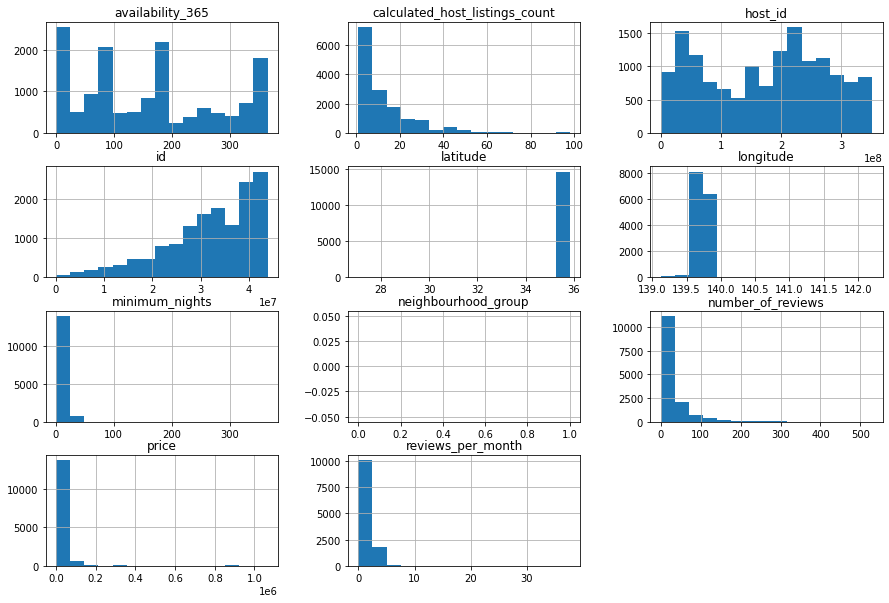

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela análise dos histogramas, percebe-se que no *dataset* em estudo existem *outliers* em variáveis como `minimum_nights`, `reviews_per_month` e `price` .

Lembrando que *outliers* são valores que fogem da normalidade e que causarão anomalias nos resultados obtidos, distorcendo toda a representação gráfica.

Há duas maneiras rápidas que auxiliam na detecção de *outliers*, são elas:
* Resumo estatístico por meio do método `describe()`;
* Plotar `boxplots` para a variável.


In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['minimum_nights','reviews_per_month','price','number_of_reviews', 
    'calculated_host_listings_count', 'availability_365']].describe()

,minimum_nights,reviews_per_month,price,number_of_reviews,calculated_host_listings_count,availability_365
count,14715.000000,12018.000000,1.471500e+04,14715.000000,14715.000000,14715.000000
mean,3.264628,1.475873,2.653451e+04,26.243765,12.752769,159.549847
std,9.069325,1.253111,7.636293e+04,40.676073,14.300715,119.088848
min,1.000000,0.020000,0.000000e+00,0.000000,1.000000,0.000000
25%,1.000000,0.540000,6.831000e+03,1.000000,3.000000,67.000000
50%,1.000000,1.260000,1.179100e+04,11.000000,8.000000,157.000000
75%,2.000000,2.120000,1.995900e+04,34.000000,17.000000,258.000000
max,365.000000,37.610000,1.066046e+06,529.000000,98.000000,365.000000


Pelo resumo estatístico acima, podemos verificar que:

* A variável `minimum_nights` possui 75% do seu valor abaixo de 2, enquanto seu valor máximo é 365;
* A variável `reviews_per_month`tem valor máximo de 37,61, enquanto que 75% de seus valores são abaixo de 2,12.
* A variável `price`apresenta 75% dos seus valores abaixo de 19959, enquanto seu valor máximo é de 1066046.

Logo, confirmamos o que foi verificado através da visualização prévia do histograma de cada variável, ou seja, há *outliers* nessas variáveis.

Para essas variáveis citadas, podemos gerar `boxplot`. Eles ajudam na visualização dos valores que fogem da normalidade e que contribuiem para o surgimento de *outliers*, como pode ser verificado abaixo:


#### Boxplot para a variável `minimum_nights`

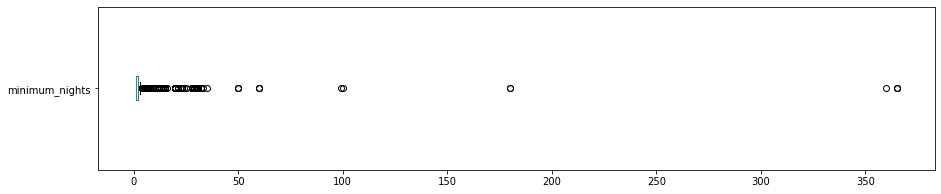


minimun nights: valores acima de 38
14 entradas
0.0951%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima 38 para minimun_nights
print("\nminimun nights: valores acima de 38")
print("{} entradas".format(len(df[df.minimum_nights>38])))
print("{:.4f}%".format((len(df[df.minimum_nights>38])/df.shape[0])*100))

#### Boxplot para a variável `reviews_per_month`

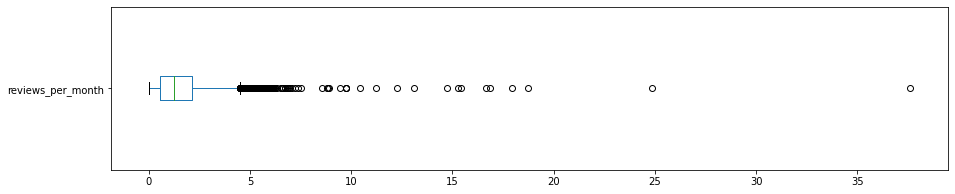


reviews per month: valores acima de 2.2
2723 entradas
18.5049%


In [ ]:
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima 2.2 para reviews per month
print("\nreviews per month: valores acima de 2.2")
print("{} entradas".format(len(df[df.reviews_per_month>2.2])))
print("{:.4f}%".format((len(df[df.reviews_per_month>2.2])/df.shape[0])*100))

#### Boxplot para a variável `price`

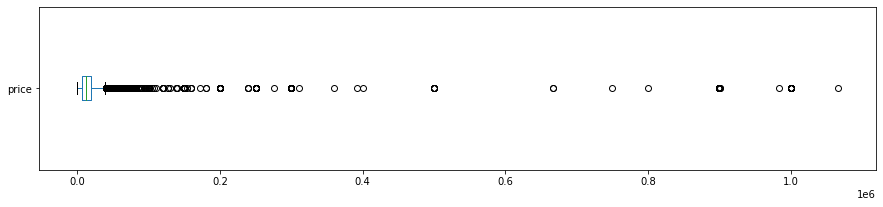


price: valores acima de 20000
3563 entradas
24.2134%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver a quantidade de valores acima 20000 para price
print("\nprice: valores acima de 20000")
print("{} entradas".format(len(df[df.price>20000])))
print("{:.4f}%".format((len(df[df.price>20000])/df.shape[0])*100))


#### Histogramas sem *ottliers*

Após a identificação dos *outliers* nas variáveis `minimum_nights`,`reviews_per_month` e `price`, podemos limpar o *DataFrame* delas e plotar novamente os histogramas.

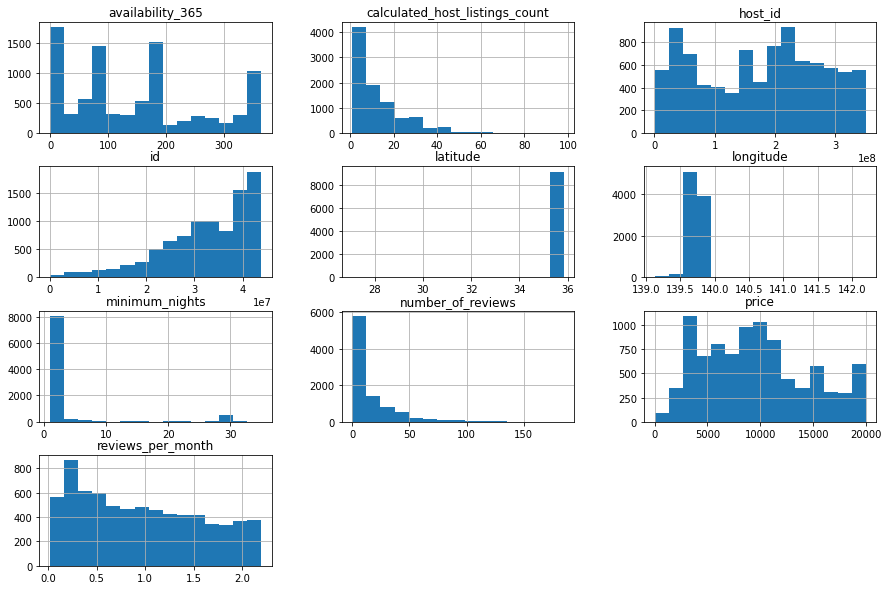

In [ ]:
# remover os *outliers* do DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights>38].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.reviews_per_month>2.2].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price>20000].index, axis=0, inplace=True)

# remover a variável neighbourhood_group, pois está vazia
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis?**

Com o intuito de investigar a intensidade da relação que existe entre as variáveis do nosso *dataset*, devemos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['availability_365', 'calculated_host_listings_count',
                'minimum_nights', 'number_of_reviews','price','reviews_per_month']].corr()

display(corr)

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price,reviews_per_month
availability_365,1.000000,0.037748,0.064139,0.059565,0.006436,0.020291
calculated_host_listings_count,0.037748,1.000000,0.111847,-0.110534,-0.081929,-0.087520
minimum_nights,0.064139,0.111847,1.000000,0.014525,-0.093252,-0.161995
number_of_reviews,0.059565,-0.110534,0.014525,1.000000,-0.044234,0.648140
price,0.006436,-0.081929,-0.093252,-0.044234,1.000000,0.097695
reviews_per_month,0.020291,-0.087520,-0.161995,0.648140,0.097695,1.000000


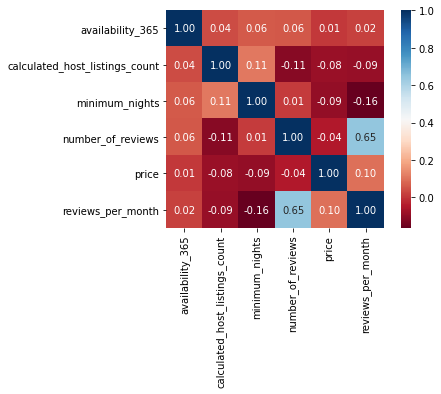

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado em Tóquio pelo Airbnb?**

Pelo Airbnb é possível alugar apartamentos, casas, apenas um quarto ou dividir com outras pessoas. Logo, determinaremos a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()` para a variável `room_type`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    5542
Private room       2528
Shared room         615
Hotel room          481
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.604626
Private room       0.275802
Shared room        0.067096
Hotel room         0.052477
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Tóquio?**

Neste tópico iremos comparar os preços das acomodações entre os bairros, com o intuito de identificar qual o bairro que apresenta os valores mais altos de aluguéis.

Para isso usaremos o método `groupby()` na variável `neighbourhoods`.


In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Miyake Mura      14996.000000
Bunkyo Ku        11799.233766
Minato Ku        11519.116959
Shibuya Ku       11272.054152
Hachijo Machi    11121.600000
Chiyoda Ku       10537.349398
Taito Ku         10523.305085
Shinjuku Ku      10464.925048
Ota Ku           10175.794286
Niijima Mura     10033.000000
Name: price, dtype: float64

Com os resultados acima, podemos constatar que o bairro de Miyake Mura apresentou a maior média de preço, com uma diferença de 3196.77 do segundo bairro mais caro.

Constata-se também que não existe muita disparidade entre as médias do segundo bairro mais caro (Bunkyo Ku) e do décimo mais caro (Niijima Mura).


### **Q7. Distribuições dos imóveis cadastrados no Airbnb em Tóquio**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

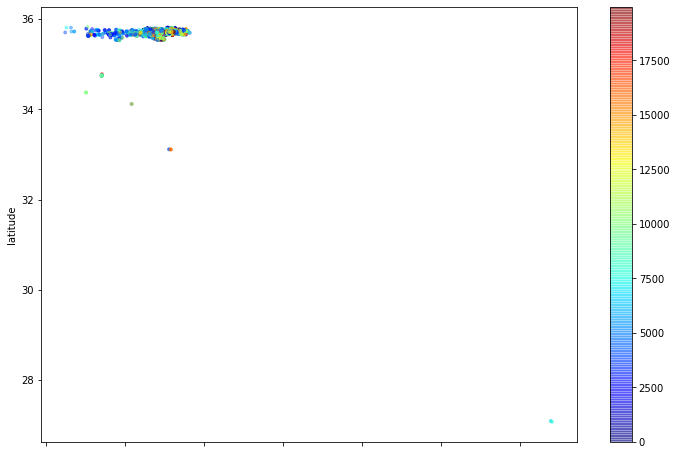

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Apesar do *dataset* utilizado ser uma versão resumida, pode-se concluir, inicialmente, que existem *outliers* em variáveis como a `price` e o `minimum_nights`.

Foi possível, também, verificar os bairros mais caros da cidade de Tóquio, e que mais de 60% dos aluguéis são de casas/apartamentos. Informação bastante importante para quem deseja, um dia, visitar a cidade.

Por fim, este notebook trouxe uma abordagem inicial sobre manipulação de dados de um *dataset* específico. Reforçamos que uam análise mais detalhada deve ser feita com o conjunto de dados mais completo, que apresenta 106 variáveis.